# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from statistics import mean
from time import time

# encodage
from sklearn.preprocessing import minmax_scale
from Encoder import Encoder

# partitionnement des données
from sklearn.model_selection import train_test_split

# modèles
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from utils import train_model

# mesures de performances
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support
from sklearn.metrics import average_precision_score
from utils import show_performances

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Lecture du dataset pre-traité

In [2]:
bf_df = pd.read_csv('./BlackFriday_Category_Preprocessed.csv')
bf_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,Product_Category
0,P00069042,F,0-17,10,A,2,0,8370,C00
1,P00248942,F,0-17,10,A,2,0,15200,AFN
2,P00087842,F,0-17,10,A,2,0,1422,L00
3,P00085442,F,0-17,10,A,2,0,1057,LN0
4,P00285442,M,55+,16,C,4+,0,7969,H00


# Encodage des colonnes

## Product ID

In [3]:
product_id_encoder = Encoder.Encoder()
product_id = bf_df["Product_ID"].tolist()
product_id_encoded = product_id_encoder.encode_data(product_id)

## Gender

In [4]:
gender_encoder = Encoder.Encoder()
gender = bf_df["Gender"].tolist()
gender_encoded = gender_encoder.encode_data(gender)

## Age

In [5]:
age_encoder = Encoder.Encoder()
age = bf_df["Age"].tolist()
age_encoded = age_encoder.encode_data(age)

## Occupation

In [6]:
occupation_encoder = Encoder.Encoder()
occupation = bf_df["Occupation"].tolist()
occupation_encoded = occupation_encoder.encode_data(occupation)

## City category

In [7]:
city_category_encoder = Encoder.Encoder()
city_category = bf_df["City_Category"].tolist()
city_category_encoded = city_category_encoder.encode_data(city_category)

## Stay In Current City Years

In [8]:
years_encoder = Encoder.Encoder()
years = bf_df["Stay_In_Current_City_Years"].tolist()
years_encoded = years_encoder.encode_data(years)

## Marital Status

In [9]:
martial_status_encoder = Encoder.Encoder()
martial_status = bf_df["Marital_Status"].tolist()
martial_status_encoded = martial_status_encoder.encode_data(martial_status)

## Purchase

In [10]:
purchase_costs = bf_df["Purchase"].tolist()

In [12]:
# ==================== First ugly try with graphics ==================== #

#np.random.seed(19680801)

#colors = np.random.rand(len(product_category))

#plt.figure(1, figsize=(120, 10))
                        
#plt.scatter(product_category, purchase_costs, c=colors, alpha=0.5)
#plt.title("Nuage de points avec Matpotlib")
#plt.xlabel("Product category")
#plt.ylabel("Product price")

#plt.savefig("purchase-graphic.png")

#plt.show()

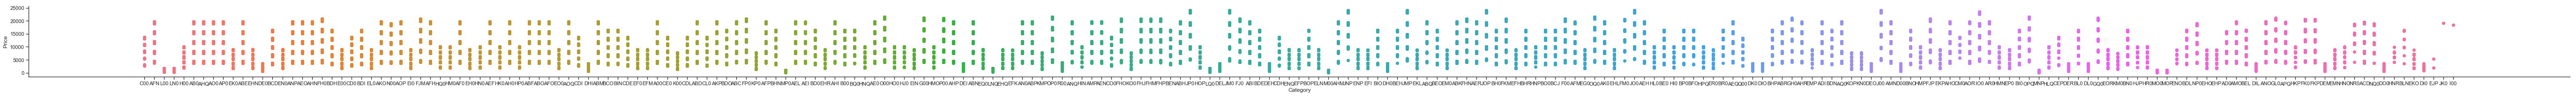

<Figure size 8640x720 with 0 Axes>

In [13]:
seaborn.set(style='ticks')

np.random.seed(0)

df_purchase = pd.DataFrame({
    'Price' : bf_df["Purchase"],
    'Category' : bf_df["Product_Category"]
})

fg = seaborn.FacetGrid(data=df_purchase, hue='Category', aspect=25.50)

plt.figure(figsize=(120, 10))

fg.map(plt.scatter, 'Category', 'Price')

fg.savefig("purchase-graphic-colored.png")

In [11]:
purchase_encoded = minmax_scale(X=purchase_costs)

## Product Category

In [12]:
product_category_encoder = Encoder.Encoder()
product_category = bf_df["Product_Category"].tolist()
product_category_encoded = product_category_encoder.encode_data(product_category)

# Classification

## Création des inputs et outputs

### Création manuelle

In [13]:
X = []

for i in range(0, len(product_id_encoded)):
    X.append([
        product_id_encoded[i],
        gender_encoded[i],
        age_encoded[i],
        occupation_encoded[i],
        city_category_encoded[i],
        years_encoded[i],
        martial_status_encoded[i],
        purchase_encoded[i]
    ])

### Numpy : column_stack

#### Inputs : X

In [14]:
X = np.column_stack((np.asarray(product_id_encoded).astype(np.object),
                     gender_encoded,
                     age_encoded,
                     occupation_encoded,
                     city_category_encoded,
                     years_encoded,
                     martial_status_encoded,
                     purchase_encoded))

#### Outputs : y

In [15]:
y = product_category_encoded

## Division des données en ensembles de test et train

## Division manuelle

In [16]:
data_size           = len(product_id_encoded)
percent_train       = 0.7
train_size          = round(data_size * percent_train)
test_size           = data_size - train_size

cpt_train           = 0
cpt_test            = 0

X_train             = []
X_test              = []
y_train             = []
y_test              = []


for ind,line in enumerate(X):
    if cpt_train < train_size:
        X_train.append(line)
        y_train.append(y[ind])
        cpt_train += 1
    else:
        X_test.append(line)
        y_test.append(y[ind])
        cpt_test += 1


print(cpt_train," train set size.")
print(cpt_test," test  set size.")

376304  train set size.
161273  test  set size.


## SkLearn : train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42,shuffle=True)

print(len(X_train)," train set size.")
print(len(X_test)," test  set size.")

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


376303  train set size.
161274  test  set size.


## SVM

### Entrainement

In [36]:
clf = SVC(
    C=1.0,
    kernel='linear',
    degree=3,
    gamma='auto',
    coef0=0.0,
    shrinking=False,
    probability=False,
    tol=0.001,
    cache_size=200,
    verbose=False,
    max_iter=5,
    decision_function_shape='ovr',
    random_state=None
)

train_model(clf, X_train, y_train)

Model entrainé en : 00:00:34


/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=5, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)

### Mesures de performances

In [37]:
show_performances(clf, X_test, y_test)

Prédictions faites en  : : 00:49:00
accuracy: 0.76%.



/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


precision: [0.00081653 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         

## Arbre de décision

### Entrainement

Récupération de la profondeur maximale de l'arbre

In [21]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.tree_.max_depth

show_performances(clf, X_test, y_test)

Prédictions faites en  : 00h00m00s
accuracy: 97.03%.

precision: [0.96       0.97857143 0.96711799 1.         0.97739228 0.96220756
 0.99053785 0.97444934 0.98176846 0.96797386 0.98640612 0.97314286
 0.94507703 0.94350282 0.97529429 0.98252185 0.99742268 0.95850622
 0.95503792 0.94724221 0.97673923 0.93981146 0.97894737 0.9694501
 0.9790795  0.86928105 0.99134688 0.9770291  0.97903564 0.98427673
 0.97843898 0.97365269 0.95116773 0.97925004 0.96546641 0.99070848
 0.92511013 0.95636998 0.97489824 0.99820467 0.99161188 0.97894737
 0.98092643 0.99506173 0.96478873 0.99456522 0.97680412 0.99418605
 0.98529412 0.98202363 0.98412698 1.         0.93866944 0.98941799
 0.93157461 0.97165131 0.91411043 0.96039604 1.         0.97902098
 0.98387097 0.9497307  0.94613749 0.9796334  0.99534884 1.
 1.         1.         0.86740331 0.94029851 0.97540984 0.94223827
 0.96911197 0.98275862 0.925      0.91735537 0.98802395 1.
 0.98591549 0.84378109 0.99661017 0.93587995 0.96564885 0.97652582
 0.99163569 0.

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [19]:
clf = tree.DecisionTreeClassifier(max_depth=27)

clf = train_model(clf, X_train, y_train)

Model entrainé en : 00:00:04


### Mesure de performances

In [20]:
show_performances(clf, X_test, y_test)

Prédictions faites en  : 00h00m01s
accuracy: 93.62%.

precision: [1.         0.9736211  0.95961538 1.         0.90101892 0.93031785
 0.99388691 0.94654788 0.98347684 0.94861963 0.98174098 0.95293399
 0.91605596 0.93714286 0.96911927 0.98062016 0.99742268 0.96517413
 0.95828699 0.92713568 0.87143939 0.92069486 0.96761134 0.98651685
 0.97087379 0.89925373 0.98870056 0.98504983 0.97708333 0.98418972
 0.97419929 0.93050648 0.95037221 0.95864014 0.95283883 0.9469526
 0.89073634 0.90489589 0.9675485  0.99266055 0.98059129 0.99465241
 0.98295455 0.99751861 0.96503497 0.99182561 0.96954315 0.99418605
 0.984375   0.98492723 0.95816993 1.         0.79093432 0.97197898
 0.90899271 0.97808619 0.82758621 0.95897436 0.96350365 0.97887324
 0.97860963 0.92961609 0.94700984 0.98305085 0.99534884 1.
 1.         1.         0.81940701 0.94029851 0.98333333 0.91532258
 0.98007968 0.99008264 0.89632107 0.9321608  0.97626419 1.
 0.98563218 0.82640333 0.99661017 0.86344605 0.95652174 0.97948718
 0.99339623 0.

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Forêts aléatoires

### Entrainement

In [22]:
clf = RandomForestClassifier(
            bootstrap=True, 
            class_weight=None,
            max_depth=None, 
            n_estimators=60,
            n_jobs=4,
            random_state=0, 
            verbose=0
            )

clf = train_model(clf, X_train, y_train)

Model entrainé en : 00:02:48


### Mesures de performances

In [23]:
show_performances(clf, X_test, y_test)

Prédictions faites en  : 00h03m09s
accuracy: 42.18%.

precision: [0.93103448 0.46391753 0.43172691 0.51059322 0.50235841 0.41993958
 0.51850072 0.28836988 0.36213445 0.57865685 0.39289895 0.1627907
 0.43878866 0.22619048 0.38527567 0.31407407 0.46350365 0.12592593
 0.41745389 0.60597826 0.47229095 0.4148784  0.24635332 0.07017544
 0.46242038 0.31168831 0.41766362 0.51131222 0.83168317 0.5385274
 0.42378917 0.14285714 0.10903427 0.35545852 0.31696429 0.23238381
 0.09128631 0.28473945 0.36315229 0.10514019 0.37331536 0.1350211
 0.24939759 0.35494881 0.37974684 0.74641148 0.34210526 0.55421687
 0.25641026 0.61913696 0.26       0.49166667 0.20773715 0.44949495
 0.46717594 0.45020921 0.05952381 0.26966292 0.33928571 0.14912281
 0.07446809 0.50805009 0.27849265 0.13649025 0.38461538 0.66097923
 0.19473684 0.08695652 0.12857143 0.07407407 0.19672131 0.13013699
 0.4863388  0.39723661 0.05543237 0.55850234 0.3080895  0.23809524
 0.2037037  0.43255295 0.65957447 0.46529563 0.04069767 0.28235294


/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
